In [1]:
using PyPlot
using JLD
include("scripts/GS.jl")
include("scripts/SOR.jl")
include("scripts/func.jl")

Fsq_only (generic function with 1 method)

In [36]:
function Edot(Ubm, Ωbm)
    Ibm = 2*Ωbm.*Ubm
    xspl = Spline1D(Ubm, Ωbm.*Ibm)
    return integrate(xspl, Ubm[1], Ubm[end]) * pi
end 

Edot (generic function with 1 method)

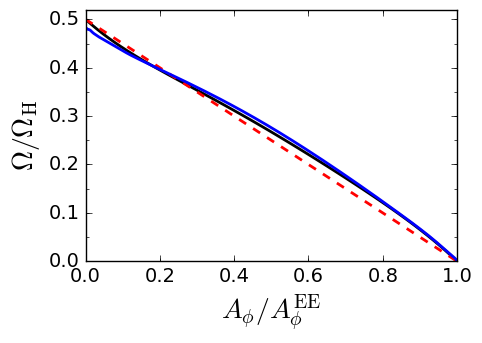

In [214]:
Ω998_sim = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.998.out")
@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a998.jld"

Ubm = linspace(0., U_H, 64)
fig = figure(figsize=(5, 3.6))
plot(Ubm/U_H, Ω_I.Ωspl(Ubm)/crd.Ω_H, lw = 2, "k")
plot(Ubm/U_H, 0.5*(1-Ubm/U_H), lw = 2, "r--")
plot(Ω998_sim[:,1]/Ω998_sim[end,1], Ω998_sim[:,2], lw = 2)
ylim(0., 0.52)
xlabel(L"$A_\phi/A_\phi^{\rm EE}$", fontsize = 20)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 20)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](0.2)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()
#savefig("f2b.pdf")

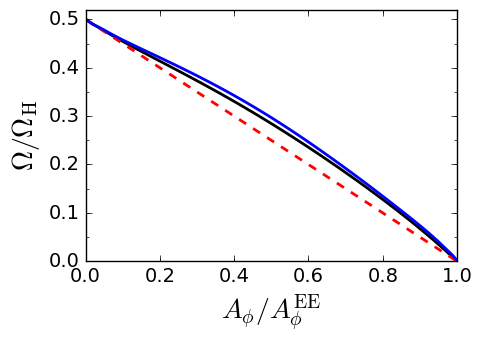

In [255]:
Ω_sim = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.990.out")
@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a99_Icrt.jld"

Ubm = linspace(0., U_H, 64)
fig = figure(figsize=(5, 3.6))
plot(Ubm/U_H, Ω_I.Ωspl(Ubm)/crd.Ω_H, lw = 2, "k")
plot(Ubm/U_H, 0.5*(1-Ubm/U_H), lw = 2, "r--")
plot(Ω_sim[:,1]/Ω_sim[end,1], Ω_sim[:,2], lw = 2)
ylim(0., 0.52)
xlabel(L"$A_\phi/A_\phi^{\rm EE}$", fontsize = 20)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 20)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](0.2)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()

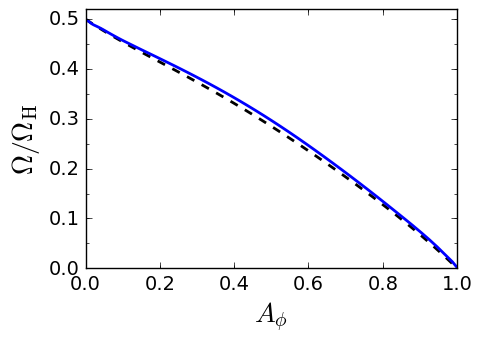

In [248]:
Ω_sim = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.990.out")
@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a0.99.jld"

Ubm = linspace(0., U_H, 64)
fig = figure(figsize=(5, 3.6))
plot(Ubm/U_H, Ω_I.Ωspl(Ubm)/crd.Ω_H, lw = 2, "k--")
#plot(Ubm/U_H, 0.5*(1-Ubm/U_H), lw = 2, "r--")
plot(Ω_sim[:,1]/Ω_sim[end,1], Ω_sim[:,2], lw = 2)
ylim(0., 0.52)
xlabel(L"$A_\phi$", fontsize = 20)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 20)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](0.2)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()

In [256]:
# fsq2_avg
Edot(Ubm, Ω_I.Ωspl(Ubm))

0.9214915618938531

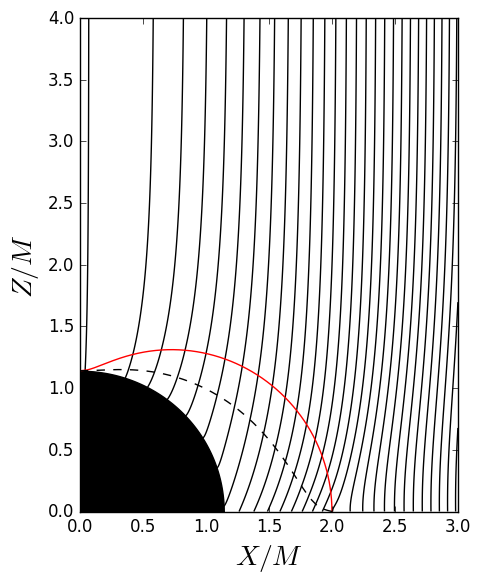

In [257]:
Rμ2xy(crd, U, ils, Umax =10.0)
savefig("f1.pdf")

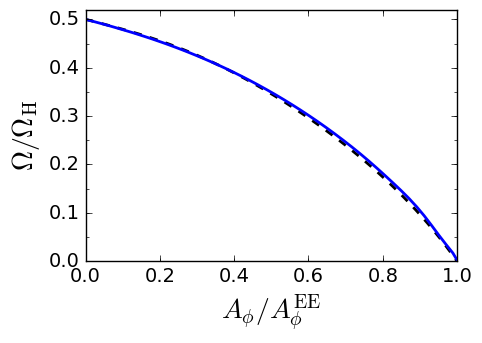

In [229]:
Ω_sim = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.900.out")
@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a0.9.jld"

Ubm = linspace(0., U_H, 64)
fig = figure(figsize=(5, 3.6))
plot(Ubm/U_H, Ω_I.Ωspl(Ubm)/crd.Ω_H, lw = 2, "k--")
plot(Ω_sim[:,1]/Ω_sim[end,1], Ω_sim[:,2], lw = 2)
ylim(0., 0.52)
xlabel(L"$A_\phi/A_\phi^{\rm EE}$", fontsize = 20)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 20)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](0.2)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()


In [69]:
function data_pre(U_H, Ω_I, crd)
    Ubm = linspace(0., U_H, 64)
    Ωbm = Ω_I.Ωspl(Ubm)
    Lum = Edot(Ubm, Ωbm)
    return Ubm, Ωbm, Lum, crd.Ω_H
end 

data_pre (generic function with 2 methods)

In [258]:
Ω_sim_090 = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.900.out")
Ω_sim_099 = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.990.out")
Ω_sim_0998 = readdlm("/home/zhenpan/Astroph/Uniform_Sol/psi_omegaf_a_0.998.out")

@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a0.9.jld"
Ubm_090, Ωbm_090, Lum_090, ΩH_090 = data_pre(U_H, Ω_I, crd) 

@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a0.95.jld"
Ubm_095, Ωbm_095, Lum_095, ΩH_095 = data_pre(U_H, Ω_I, crd)

@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a0.99.jld"
Ubm_099, Ωbm_099, Lum_099, ΩH_099 = data_pre(U_H, Ω_I, crd) 

@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a995.jld"
Ubm_0995, Ωbm_0995, Lum_0995, ΩH_0995 = data_pre(U_H, Ω_I, crd) 

@load "/home/zhenpan/Astroph/Uniform_Sol/scripts/a998.jld"
Ubm_0998, Ωbm_0998, Lum_0998, ΩH_0998 = data_pre(U_H, Ω_I, crd) 

(linspace(0.0,5.5035144989652,64),[0.234666,0.229647,0.224908,0.22042,0.216156,0.212091,0.208202,0.204466,0.200864,0.197377  …  0.0423568,0.0381537,0.0338574,0.029456,0.024936,0.020283,0.0154809,0.0105125,0.00535896,0.0],0.9659170791590195,0.4693317068390503)

In [259]:
Lum_099

0.9242531625526836

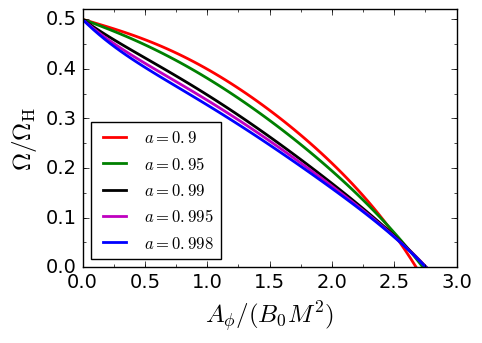

In [265]:
fig = figure(figsize=(5, 3.6))

B0 = 2
plot(Ubm_090/B0, Ωbm_090/ΩH_090, label =L"$a = 0.9$", lw=2, "r")
plot(Ubm_095/B0, Ωbm_095/ΩH_095, label =L"$a = 0.95$", lw=2, "g" )
plot(Ubm_099/B0, Ωbm_099/ΩH_099, label =L"$a = 0.99$", lw=2, "k" )
plot(Ubm_0995/B0, Ωbm_0995/ΩH_0995, label =L"$a = 0.995$", lw=2, "m")
plot(Ubm_0998/B0, Ωbm_0998/ΩH_0998, label =L"$a = 0.998$", lw=2, "b")

legend(loc ="best", fontsize = 12)

ylim(0., 0.52)
xlabel(L"$A_\phi/(B_0M^2)$", fontsize = 18)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 18)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
Mx = matplotlib[:ticker][:MultipleLocator](0.5)
mx = matplotlib[:ticker][:MultipleLocator](0.25)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_major_locator](Mx)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()
savefig("f2a.pdf")

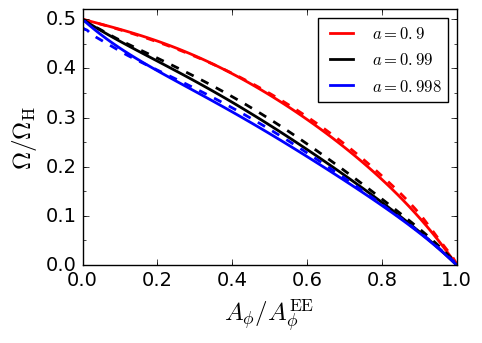

In [266]:

fig = figure(figsize=(5, 3.6))
plot(Ubm_090/Ubm_090[end], Ωbm_090/ΩH_090, lw = 2, "r-", label =L"$a = 0.9$")
plot(Ω_sim_090[:,1]/Ω_sim_090[end,1], Ω_sim_090[:,2], lw = 2, "r--")

plot(Ubm_099/Ubm_099[end], Ωbm_099/ΩH_099, lw = 2, "k-", label =L"$a = 0.99$")
plot(Ω_sim_099[:,1]/Ω_sim_099[end,1], Ω_sim_099[:,2], lw = 2, "k--")

plot(Ubm_0998/Ubm_0998[end], Ωbm_0998/ΩH_0998, lw = 2, "b-", label =L"$a = 0.998$")
plot(Ω_sim_0998[:,1]/Ω_sim_0998[end,1], Ω_sim_0998[:,2], lw = 2, "b--")


legend(loc ="best", fontsize = 12)

ylim(0., 0.52)
xlabel(L"$A_\phi/A_\phi^{\rm EE}$", fontsize = 18)
ylabel(L"$\Omega/ \Omega_{\rm H}$", fontsize = 18)
tick_params(axis="both", which="major", length =4, labelsize=14)
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](0.2)
My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
my = matplotlib[:ticker][:MultipleLocator](0.05)
ax[:xaxis][:set_minor_locator](mx)
ax[:yaxis][:set_major_locator](My)
ax[:yaxis][:set_minor_locator](my)
tight_layout()
savefig("f2b.pdf")

In [262]:
Esim = readdlm("/home/zhenpan/Astroph/Uniform_Sol/energy_flux.out")

acol = [0.9, 0.95, 0.99, 0.995, 0.998]
Lcol = [Lum_090, Lum_095, Lum_099, Lum_0995, Lum_0998]
r_pls  = 1+sqrt(1-acol.^2); ΩH   = acol./(2*r_pls);

In [233]:
Lumodel(x, p) = 6.11*(x.^2+p[1]*x.^4+ p[2]*x.^6+p[3]*x.^8- 2^9/10.*(1+ p[1]*4./2^3 + p[2]*6./2^5 + p[3]*8./2^7)) 

5-element Array{Float64,1}:
 0.313395
 0.361974
 0.433804
 0.452324
 0.469332

In [192]:
Lmix = zeros(Esim[:,1]); Lmix[end-4:end] = Lcol; Lmix[1:end-5] = Esim[1:end-5,3]
Lfit = curve_fit(Lumodel, Esim[:,1], Esim[:,3], [0., 0.,0.])

x = collect(linspace(0., 0.5, 32));   xfit = Lumodel(x, Lfit.param); yfit = Lumodel(x, yfit.param)

LsqFit.LsqFitResult{Float64}(11,[4.09793,-41.7814,76.56],[0.0139016,0.0139,0.0138884,0.013799,0.0105042,-0.00328277,-0.0153801,-0.0305201,-0.0458817,0.00899254,0.0253462,0.0147091,-0.00155807,-0.0184245],[-156.416 -58.656 -19.552; -156.416 -58.656 -19.552; … ; -156.16 -58.6037 -19.5413; -156.12 -58.5907 -19.5376],true)

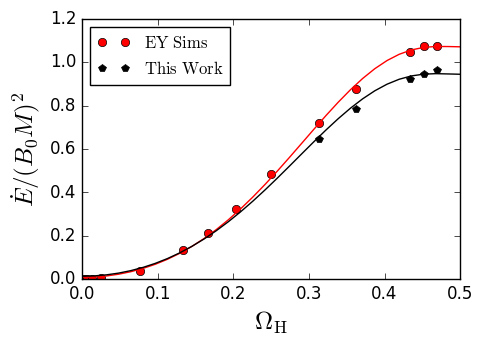

In [264]:
fig = figure(figsize=(5, 3.6))

plot(Esim[:,1], Esim[:,3], "ro", label = L"$\rm EY\  Sims$")
plot(x, xfit, "r")
plot(ΩH, Lcol, "kp", label = L"$\rm This \ Work $")
plot(x, yfit, "k")

legend(loc = "upper left", fontsize = 12)
xlabel(L"$\Omega_{\rm H}$", fontsize = 18)
ylabel(L"$\dot E/(B_0M)^2$", fontsize = 18)
tight_layout()
savefig("f3.pdf")